# Pollen in winds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from inertia_3d_particle import euler_maruyama_3d

# Paramètres de la simulation
step = 10000 # Nombre de pas de temps
dt = 0.01 # Pas de temps
gamma = 1.0 # Coefficient de friction
D = 1.0 # Coefficient de diffusion
x0 = 0.0 # Position initiale

# Simulation du mouvement brownien
T = step*dt # Temps total de simulation
t = np.arange(0, T, dt)

# Simulation de plusieurs random-walk pour faire la moyenne sur plein
n_walks = 1000
x_0 = np.zeros((n_walks, 3)) # Position initiale pour chaque random walk

In [9]:
x_vec, v_vec = euler_maruyama_3d(D, gamma, T, dt, x_0=x_0)

In [3]:
x_vec.shape

(10000, 1000, 3)

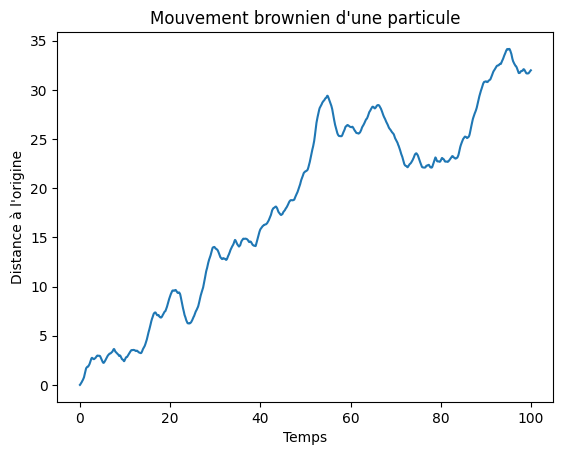

In [10]:
norm = np.linalg.norm(x_vec, axis=2)
plt.plot(t, norm[:, 5])
plt.xlabel("Temps")
plt.ylabel("Distance à l'origine")
plt.title("Mouvement brownien d'une particule")
plt.show()

In [5]:
norm.shape

(10000, 1000)

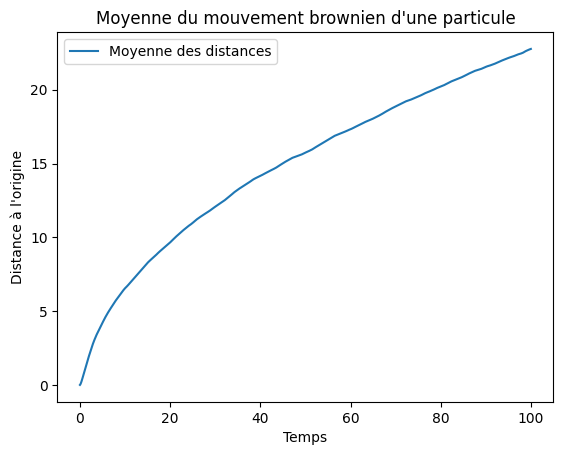

In [6]:
plt.plot(t, norm.mean(axis=1), label="Moyenne des distances")
plt.xlabel("Temps")
plt.ylabel("Distance à l'origine")
plt.title("Moyenne du mouvement brownien d'une particule")
plt.legend()
plt.show()

## Maxwell boltzmann distribution

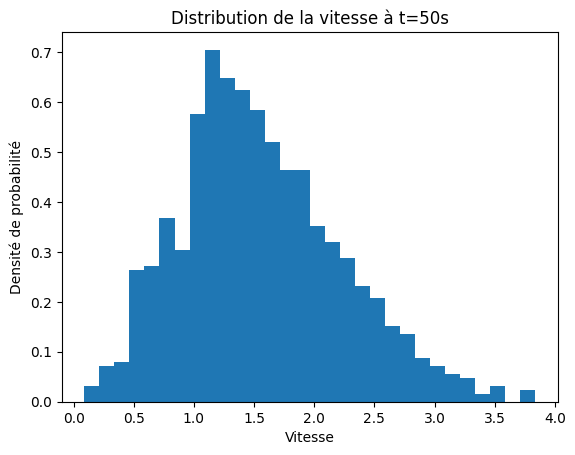

In [8]:
v_norm = np.linalg.norm(v_vec, axis=2)
plt.hist(v_norm[5000, :], bins=30, density=True)
plt.xlabel("Vitesse")
plt.ylabel("Densité de probabilité")
plt.title("Distribution de la vitesse à t=50s")
plt.show()

In [ ]:
def gravity(x, v, dt):
    """Accélération de pesenteur"""
    return np.array([0, 0, -0.01])

air_resistance = 1

def slimy_friction(x, v, dt):
    """Frotement visqueux"""
    return - air_resistance * v



def wind(x, v, dt):
    """Vent aléatoire"""
    return np.random.normal(0, 0.1, size=x.shape)

def f(x, v, dt):
    return gravity(x, v, dt) + slimy_friction(x, v, dt) + wind(x, v, dt)

In [54]:
x_vec, v_vec = euler_maruyama_3d(D, gamma, T, dt, x_0=x_0, f=f)

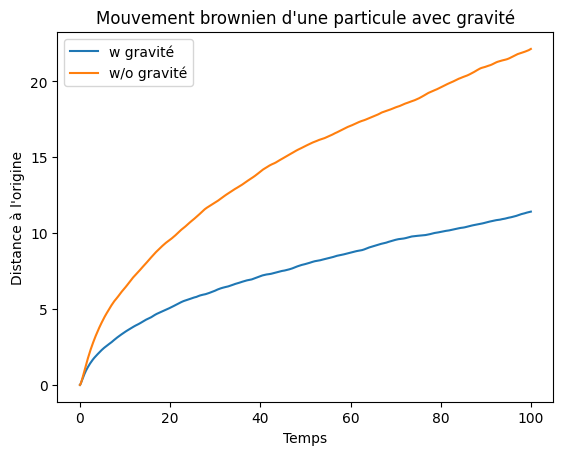

In [55]:
x_norm = np.linalg.norm(x_vec, axis=2)
plt.plot(t, x_norm[:, :].mean(axis=1), label="w gravité")
plt.plot(t, norm[:, :].mean(axis=1), label="w/o gravité")
plt.xlabel("Temps")
plt.ylabel("Distance à l'origine")
plt.title("Mouvement brownien d'une particule avec gravité")
plt.legend()
plt.show()